### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(699, 11)

In [4]:
df.size

7689

In [6]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### Distribution of the classes

In [ ]:
benign_df = df[df['Class']==2][0:200]
malignant_df = df[df['Class']==4][0:200]

<Axes: xlabel='Clump', ylabel='UnifSize'>

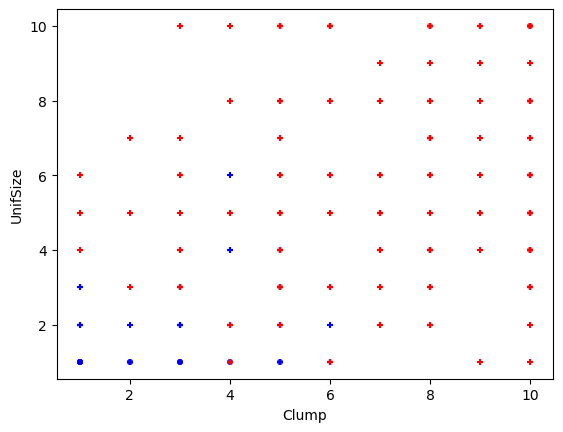

In [14]:
axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',marker='+')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',marker='+',ax=axes)

### Identifying unwanted rows

In [15]:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]

In [16]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [18]:
df['BareNuc']=df['BareNuc'].astype('int')

/var/folders/x7/kvfvn5f1181fksv5hmzp9zt00000gn/T/ipykernel_24491/448463027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc']=df['BareNuc'].astype('int')


In [19]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### Removing unwanted rows

In [20]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [23]:
X=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]


In [24]:
y=df['Class']

### Splitting the data for train and test 

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [27]:
len(X_train)

546

In [28]:
len(X_test)

137

### Modelling svm with scikit learn

In [62]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)

In [63]:
classifier

SVC(C=2, gamma='auto', kernel='linear')

In [64]:
classifier.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [65]:
y_predict=classifier.predict(X_test)

### Evaluation (Results)

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [68]:
classifier.score(X_test,y_test)

0.9635036496350365